## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.

In [234]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [235]:
city_df =  pd.read_csv('city_data.csv')
ride_df =  pd.read_csv('ride_data.csv')

In [236]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [237]:
citytype= city_df.drop_duplicates('city')

In [238]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [239]:
merge_df = ride_df.merge(city_df, on="city")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [240]:
GroupedCity = merge_df.groupby(['city'])

In [241]:
merge_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [216]:
#Average Fare ($) Per City
AvgFare = GroupedCity['fare'].mean()

#Total Number of Rides Per City
RidesByCity = GroupedCity['ride_id'].count()

#Total Number of Drivers Per City
DriversByCity = GroupedCity['driver_count'].mean()



In [217]:
#City Type (Urban, Suburban, Rural)
citytype2 = citytype.set_index('city')['type']


In [218]:
city_df2 = pd.DataFrame({
    "Number of Rides": RidesByCity,
    "Average Fare": AvgFare,
    "Number of Drivers": DriversByCity,
    "Type of City": citytype2})

city_df2.head()

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


In [219]:
rural = city_df2.loc[city_df2['Type of City']=='Rural']
urban = city_df2.loc[city_df2['Type of City']=='Urban']
suburban = city_df2.loc[city_df2['Type of City']=='Suburban']

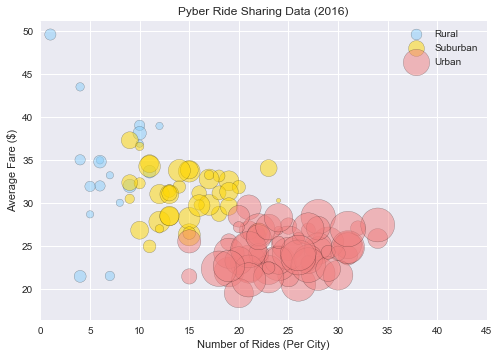

In [220]:
plt.scatter(rural['Number of Rides'],rural['Average Fare'],s=rural['Number of Drivers']*18, color = 'lightskyblue',edgecolor = 'black', label = 'Rural', alpha = .50)
plt.scatter(suburban['Number of Rides'],suburban['Average Fare'],s=suburban['Number of Drivers']*18, color = 'gold',edgecolor = 'black', label = "Suburban", alpha = .50)
plt.scatter(urban['Number of Rides'],urban['Average Fare'],s=urban['Number of Drivers']*18, color = 'lightcoral',edgecolor = 'black', label = "Urban", alpha = .50)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,45)
plt.legend(loc="best")
plt.show()

In [221]:
total_fares_amount = merge_df.fare.sum()
total_rides_amount = merge_df.ride_id.count()
total_drivers_amount = DriversByCity.sum()

print(total_fares_amount, total_rides_amount, total_drivers_amount)


64669.11999999993 2407 3340


In [222]:
fare_urban = merge_df.fare[merge_df.type == 'Urban'].sum() 
fare_urban = round(fare_urban/total_fares_amount,2)

fare_suburban = merge_df.fare[merge_df.type == 'Suburban'].sum() 
fare_suburban = round(fare_suburban/total_fares_amount,2)

fare_rural = merge_df.fare[merge_df.type == 'Rural'].sum() 
fare_rural = round(fare_rural/total_fares_amount,2)

check = fare_rural+fare_suburban+fare_urban

print(fare_urban, fare_suburban, fare_rural,check)

0.62 0.31 0.07 1.0


In [223]:
ride_urban = merge_df.ride_id[merge_df.type == 'Urban'].count() 
ride_urban = round(ride_urban/total_rides_amount,2)

ride_suburban = merge_df.ride_id[merge_df.type == 'Suburban'].count() 
ride_suburban = round(ride_suburban/total_rides_amount,2)

ride_rural = merge_df.ride_id[merge_df.type == 'Rural'].count() 
ride_rural = round(ride_rural/total_rides_amount,2)

check = ride_rural+ride_suburban+ride_urban

print(ride_urban, ride_suburban, ride_rural,check)

0.68 0.27 0.05 1.0


In [224]:
driver_urban = city_df2['Number of Drivers'][city_df2['Type of City'] == 'Urban'].sum() 
driver_urban = round(driver_urban/total_drivers_amount,2)

driver_suburban = city_df2['Number of Drivers'][city_df2['Type of City'] == 'Suburban'].sum() 
driver_suburban = round(driver_suburban/total_drivers_amount,2)

driver_rural = city_df2['Number of Drivers'][city_df2['Type of City'] == 'Rural'].sum() 
driver_rural = round(driver_rural/total_drivers_amount,2)

check = driver_rural+driver_suburban+driver_urban

print(driver_urban, driver_suburban, driver_rural,check)

0.78 0.19 0.03 1.0


In [225]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [fare_urban, fare_rural, fare_suburban]

explode = (0.1, 0, 0)

colors = ["lightcoral", "lightskyblue", "gold"]

In [226]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City')
plt.axis('equal')

(-1.1456387091881919,
 1.1005397849713336,
 -1.2140675886608301,
 1.1173372670127844)

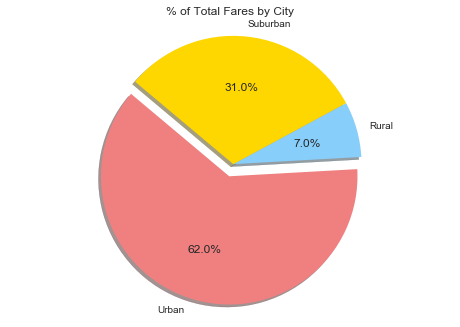

In [227]:
plt.show()

In [228]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [ride_urban, ride_rural, ride_suburban]

explode = (0.1, 0, 0)

colors = ["lightcoral", "lightskyblue", "gold"]

In [229]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Rides by City')
plt.axis('equal')

(-1.130485183549818,
 1.1011915377523607,
 -1.2198803193310201,
 1.1090278721325668)

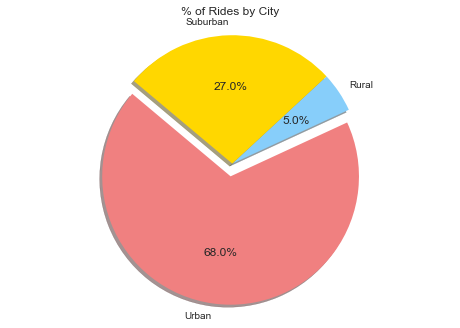

In [230]:
plt.show()

In [231]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [driver_urban, driver_rural, driver_suburban]

explode = (0.1, 0, 0)

colors = ["lightcoral", "lightskyblue", "gold"]

In [232]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Drivers by City')
plt.axis('equal')

(-1.0875059481447162,
 1.1229292639553781,
 -1.2093192616231283,
 1.1227970759532651)

plt.show()